[View in Colaboratory](https://colab.research.google.com/github/iiwakuralain/TCC2/blob/master/MLP_regressor_multi_input.ipynb)

In [0]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [308]:
!pip install -q xlrd
!git clone https://github.com/iiwakuralain/TCC2

fatal: destination path 'TCC2' already exists and is not an empty directory.


In [309]:
cd TCC2

/content/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2


In [310]:
ls

db.csv                           MLP_regressor_single_input.ipynb
db_ok.csv                        neural_MLPRegressor.ipynb
LICENSE                          neural_MLPRegressor_one_input.ipynb
linear.ipynb                     NeuralNetwork_Simple_Test.ipynb
MLP_regressor_multi_input.ipynb  TCC2/


In [0]:
import pandas as pd
df = pd.read_csv('db_ok.csv')

In [0]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [0]:
joinville = df.loc[(df['cidade'] == 1)]

In [314]:
joinville.head()

,cidade,m2Aprox,4mm,3mm,$4mm,$3mm
0,1,58.652928,18054.0,15045.00000,297.782896,256.508935
1,1,148.766748,45000.0,38160.00000,297.782896,256.508935
2,1,17.855129,5000.0,4580.00000,297.782896,256.508935
3,1,120.552592,35898.5,30922.81693,297.782896,256.508935
4,1,14.619374,4375.0,3750.00000,297.782896,256.508935


In [315]:
joinville.shape

(95, 6)

In [316]:
mydf = joinville.astype('int64')
print(mydf.info()) # Overview of dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 94
Data columns (total 6 columns):
cidade     95 non-null int64
m2Aprox    95 non-null int64
4mm        95 non-null int64
3mm        95 non-null int64
$4mm       95 non-null int64
$3mm       95 non-null int64
dtypes: int64(6)
memory usage: 5.2 KB
None


In [317]:
df_joinville = mydf.drop(['3mm'], axis=1)
y = mydf['3mm']

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df_joinville, y, test_size=0.30)
print(X_train.shape, y_train.shape)

((66, 5), (66,))


In [0]:
from sklearn.neural_network import MLPRegressor

In [0]:
clf = MLPRegressor(solver='lbfgs',
                    hidden_layer_sizes=(100,), random_state=1)

In [320]:
clf.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [0]:
predictions = clf.predict(X_test)

In [322]:
buildCompareT = {'m2Aprox': X_test['m2Aprox'], 'yTest': y_test, 'yPredicted':predictions.astype('int64')}
compareT = pd.DataFrame(data=buildCompareT)
compareT

,m2Aprox,yPredicted,yTest
77,1370,366034,351417
41,280,71658,78400
86,25,7005,6460
87,17,5093,4799
25,7,2551,2047
73,46,12153,12026
4,14,4330,3750
74,9,3070,2496
5,141,36570,36366
11,691,171883,177368


Text(0,0.5,u'Predictions')

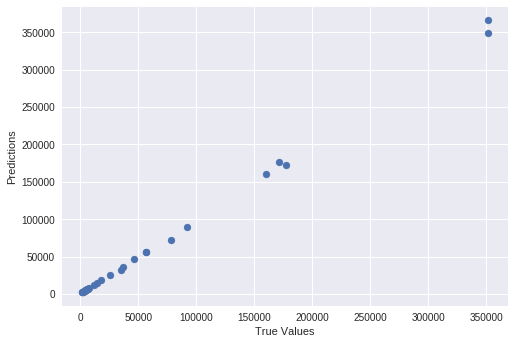

In [323]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [324]:
r2_score(y_test, predictions)

0.9987096933805435

In [325]:
mean_squared_error(y_test, predictions)

11420278.390420977

In [326]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, predictions)

1616.2945309679985

In [327]:
"""
Regression metrics
See the Regression metrics section of the user guide for further details.

metrics.explained_variance_score(y_true, y_pred)	Explained variance regression score function
metrics.mean_absolute_error(y_true, y_pred)	Mean absolute error regression loss
metrics.mean_squared_error(y_true, y_pred[, …])	Mean squared error regression loss
metrics.mean_squared_log_error(y_true, y_pred)	Mean squared logarithmic error regression loss
metrics.median_absolute_error(y_true, y_pred)	Median absolute error regression loss
metrics.r2_score(y_true, y_pred[, …])	R^2 (coefficient of determination) regression score function.
"""
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

print 'explained_variance_score: '
explained_variance_score(y_test, predictions)


explained_variance_score: 


0.9987173814779896

In [328]:

print 'mean_absolute_error: '
mean_absolute_error(y_test, predictions)



mean_absolute_error: 


1616.2945309679985

In [329]:

print 'mean_squared_error: '
mean_squared_error(y_test, predictions)



mean_squared_error: 


11420278.390420977

In [330]:
print 'median_absolute_error: '
median_absolute_error(y_test, predictions)



median_absolute_error: 


545.4918044202432

In [331]:
print 'r2_score: '
r2_score(y_test, predictions)

r2_score: 


0.9987096933805435